# **<center>Bezier-Kurven</center>**

## Problemlösung

### Aufgabe 2, 3:  
Andreas Hager

Zur Klärung der Aufgabenstellung haben wir die Quelle http://www.fachgruppe-computeralgebra.de/data/JdM-2008/Sonderheft.pdf (2008, S. 9-11) zu Rate gezogen. 

Aus dieser Quelle habe ich die Idee fuer den Algorithmus zum erstellen von Bezier-Kurven vom Grad 2, welchen ich auf kubische Kurven erweitert habe:

```
Seien A, B, C, D element RxR  
Strecken AB, BC, CD  
Sei E element RxR ein Punkt auf der Strecke AB  
Sei t element R  
Wähle t so das t = AE / AD  
      => t element [0, 1]  
Wähle F, G, H, I, J element RxR,  
    so dass gilt:  
       F = B + t*BC  
       G = C + t*CD  
       H = E + t*EF  
       I = F + t*FG  
       J = H + t*HI 
Der Punkt J wandert auf der Kurve.
```

In [1]:
class CubicBezier:
    """
    :author Andreas Hager:
    Diese Klasse repräsentiert eine Kubische Bezier-Kurfe
    """
    
    def __init__(self, a, b, c, d):
        """initialisiert die Fixpunkte"""
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        
        t = var('t')
        assume(t >= 0)
        assume(t <= 1)
        
        self.e = self.a + t*(self.b - self.a)
        self.f = self.b + t*(self.c - self.b)
        self.g = self.c + t*(self.d - self.c)
        self.h = self.e + t*(self.f - self.e)
        self.i = self.f + t*(self.g - self.f)
        self.j = self.h + t*(self.i - self.h)

    def get_explicit_function(self):
        self.j[0] = self.j[0].full_simplify()
        self.j[1] = self.j[1].full_simplify()
        return self.j
    
    def get_kurve(self, upTo=1):
        function = self.get_explicit_function()
        return parametric_plot((function[0], function[1]), (0, upTo), color=hue(0.6), thickness=2)
    
    def get_animation(self, steps):
        """Aufgabe 3"""
        plot = self.draw_base_lines()
        
        list = [self.e, self.f, self.g, self.h, self.i, self.j]

        sines = [self.list_plot_points(list, counter/(steps+2)) + 
                 plot + self.draw_lines(list, counter/(steps+2)) + 
                 self.get_kurve(counter/(steps+2)) for counter in range(1, steps+1)]
        animation = animate(sines)
        
        return animation
    
    

    
    
    def draw_base_lines(self):
        punkte = [self.a, self.b, self.c, self.d]
        plot = list_plot(punkte, color='green', pointsize=30, figsize=6)
        plot += line([self.a, self.b], color='green', thickness=1)
        plot += line([self.b, self.c], color='green', thickness=1)
        plot += line([self.c, self.d], color='green', thickness=1)
        return plot
        
    
    def draw_lines(self, list, value=1):
        plot = line([(list[0][0](value), list[0][1](value)), (list[1][0](value), list[1][1](value))], color='green', thickness=1)
        plot += line([(list[1][0](value), list[1][1](value)), (list[2][0](value), list[2][1](value))], color='green', thickness=1)
        plot += line([(list[3][0](value), list[3][1](value)), (list[4][0](value), list[4][1](value))], color='green', thickness=1)
        return plot
        
    def list_plot_points(self, list, value=1):
        return list_plot([(list[i][0](value), list[i][1](value))  for i in range(len(list))], color = 'green')
        

-139*t^3 + 225*t^2 - 99*t + 5

26*t^3 - 108*t^2 + 81*t + 1

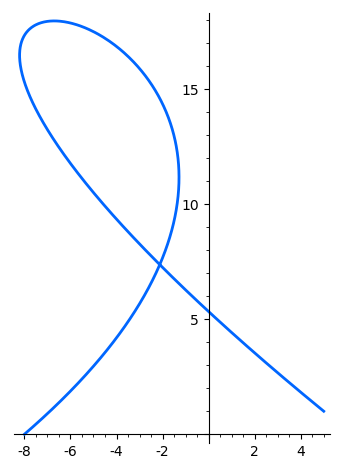

/opt/sagemath-8.6/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:42: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


Animation with 40 frames
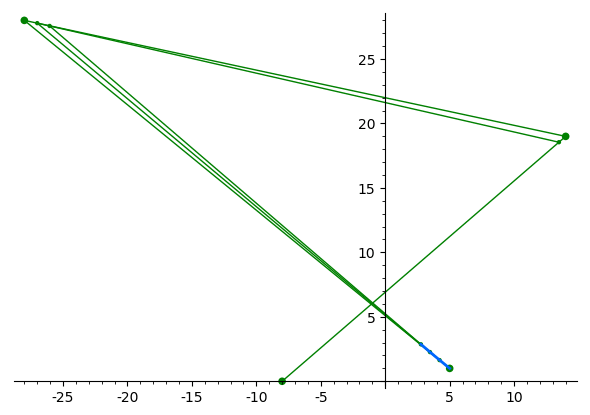

In [2]:
a = vector([5, 1])
b = vector([-28, 28])
c = vector([14, 19])
d = vector([-8, 0])


cubic = CubicBezier(a, b, c, d)

function = cubic.get_explicit_function()
pretty_print(function[0])
pretty_print(function[1])

plot = cubic.get_kurve()
show(plot)

steps = 40
animation = cubic.get_animation(steps)
show(animation)
animation.gif(savefile='bezier_animation.gif', delay=35, iterations=3)

# Aufgabe4:

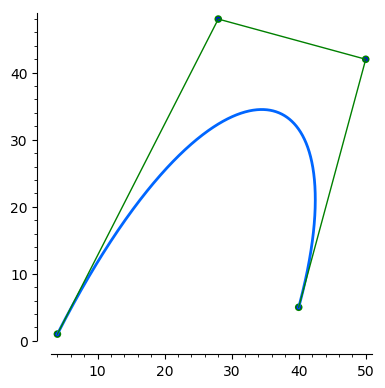

In [5]:
p1 = vector([4, 1])
p2 = vector([28, 48])
p3 = vector([50, 42])
p4 = vector([40, 5])

cubic = CubicBezier(p1, p2, p3, p4)

plot = cubic.getKurve()
plot += cubic.drawBaseLines()
plot += list_plot([p1, p2, p3, p4])
show(plot)

Die Mittleren Punkte geben an, wie weit die Kurve in die ebene, wie mit einem Gumiband verbunden, gezogen wird.

# Aufgabe 5:

In [56]:
# Aufstellen einer algemeinen kubischen Bezier-Kurve,
# mit den Punkten P_1, P_2, P_3, P_4, welche durch die Vectoren p1, p2, p3, p4
# dargestellt werden.
p1x, p2x, p3x, p4x = var('p1x, p2x, p3x, p4x')
p1y, p2y, p3y, p4y = var('p1y, p2y, p3y, p4y')
p1 = vector([p1x, p1y])
p2 = vector([p2x, p2y])
p3 = vector([p3x, p3y])
p4 = vector([p4x, p4y])
cubic = CubicBezier(p1, p2, p3, p4)

# Allgemeine algebraische darstellung der Kurve
function = cubic.getExplicitFunction()

# Ableitund der Kurve
dFunction = vector([diff(function[0], t), diff(function[1], t)])

# Einsetzen des wertes 0 in die Ableitung 
# => wir haben den Steigungsvector an dem Punkt P_1
dSubs0Vector = vector([dFunction[0].substitute(t=0), dFunction[1].substitute(t=0)])
# mit dieser Logischen gleichheit ist gezeigt, dass der Steigungsvector
# ein vielfaches der Strecke P_1P_2 = P_2 - P_1 ist.
print(dSubsVector == 3*(p2 - p1))
# => Die Kurventangente in P_1 geht durch P_2

# Einsetzen des wertes 1 in die Ableitung 
# => wir haben den Steigungsvector an dem Punkt p4
dSubs1Vector = vector([dFunction[0].substitute(t=1), dFunction[1].substitute(t=1)])
# mit dieser Logischen gleichheit ist gezeigt, dass der Steigungsvector
# ein vielfaches der Strecke P_3P_4 = P_4 - P_3 ist.
print(dSubs1Vector == 3*(p4 - p3))
# => Die Kurventangente in P_4 geht durch P_3

True
True
